In [1]:
# backpropagation example for deep learning in python class.
# with sigmoid activation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [5]:
# add for Python 3
def xrange(x):

    return iter(range(x))

In [6]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z


# determine the classification rate
# num correct / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in xrange(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total


def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1] # H is (N, M)

    # # slow
    # ret1 = np.zeros((M, K))
    # for n in xrange(N):
    #     for m in xrange(M):
    #         for k in xrange(K):
    #             ret1[m,k] += (T[n,k] - Y[n,k])*Z[n,m]

    # # a bit faster - let's not loop over m
    # ret2 = np.zeros((M, K))
    # for n in xrange(N):
    #     for k in xrange(K):
    #         ret2[:,k] += (T[n,k]* - Y[n,k])*Z[n,:]

    # assert(np.abs(ret1 - ret2).sum() < 0.00001)

    # # even faster  - let's not loop over k either
    # ret3 = np.zeros((M, K))
    # for n in xrange(N): # slow way first
    #     ret3 += np.outer( Z[n], T[n] - Y[n] )

    # assert(np.abs(ret1 - ret3).sum() < 0.00001)

    # fastest - let's not loop over anything
    ret4 = Z.T.dot(T - Y)
    # assert(np.abs(ret1 - ret4).sum() < 0.00001)

    return ret4


def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape

    # slow way first
    # ret1 = np.zeros((X.shape[1], M))
    # for n in xrange(N):
    #     for k in xrange(K):
    #         for m in xrange(M):
    #             for d in xrange(D):
    #                 ret1[d,m] += (T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1 - Z[n,m])*X[n,d]

    # fastest
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)

    # assert(np.abs(ret1 - ret2).sum() < 0.00001)

    return ret2


def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)


def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)


def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()


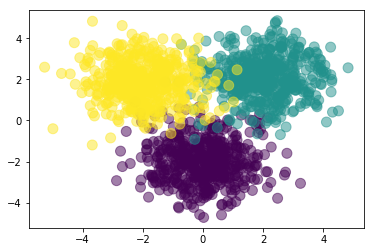

cost: -2880.46276171 classification_rate: 0.3333333333333333
cost: -2667.74663432 classification_rate: 0.3333333333333333
cost: -2481.36254191 classification_rate: 0.3333333333333333
cost: -2319.89851598 classification_rate: 0.3333333333333333
cost: -2181.13394234 classification_rate: 0.3333333333333333
cost: -2062.37966308 classification_rate: 0.3333333333333333
cost: -1960.80492404 classification_rate: 0.3333333333333333
cost: -1873.69031524 classification_rate: 0.33466666666666667
cost: -1798.58393266 classification_rate: 0.33466666666666667
cost: -1733.37061842 classification_rate: 0.33666666666666667
cost: -1676.27968623 classification_rate: 0.3446666666666667
cost: -1625.85734469 classification_rate: 0.356
cost: -1580.92369619 classification_rate: 0.37533333333333335
cost: -1540.52668894 classification_rate: 0.3973333333333333
cost: -1503.89946738 classification_rate: 0.4226666666666667
cost: -1470.42373294 classification_rate: 0.44066666666666665
cost: -1439.59959332 classificat

cost: -453.718268209 classification_rate: 0.9513333333333334
cost: -451.673860479 classification_rate: 0.9513333333333334
cost: -449.654048748 classification_rate: 0.952
cost: -447.658407215 classification_rate: 0.952
cost: -445.686519418 classification_rate: 0.952
cost: -443.737977998 classification_rate: 0.952
cost: -441.812384472 classification_rate: 0.952
cost: -439.909349012 classification_rate: 0.952
cost: -438.028490229 classification_rate: 0.952
cost: -436.169434958 classification_rate: 0.952
cost: -434.331818063 classification_rate: 0.952
cost: -432.515282227 classification_rate: 0.952
cost: -430.719477766 classification_rate: 0.952
cost: -428.944062436 classification_rate: 0.952
cost: -427.188701251 classification_rate: 0.9526666666666667
cost: -425.453066303 classification_rate: 0.9526666666666667
cost: -423.736836589 classification_rate: 0.9526666666666667
cost: -422.039697842 classification_rate: 0.9526666666666667
cost: -420.361342364 classification_rate: 0.95266666666666

cost: -299.071894027 classification_rate: 0.9566666666666667
cost: -298.498329373 classification_rate: 0.9566666666666667
cost: -297.928744492 classification_rate: 0.9573333333333334
cost: -297.363101159 classification_rate: 0.9573333333333334
cost: -296.801361634 classification_rate: 0.9573333333333334
cost: -296.243488652 classification_rate: 0.9573333333333334
cost: -295.689445418 classification_rate: 0.9573333333333334
cost: -295.139195595 classification_rate: 0.9573333333333334
cost: -294.592703303 classification_rate: 0.9573333333333334
cost: -294.049933106 classification_rate: 0.9573333333333334
cost: -293.510850007 classification_rate: 0.9573333333333334
cost: -292.975419442 classification_rate: 0.958
cost: -292.443607273 classification_rate: 0.958
cost: -291.91537978 classification_rate: 0.958
cost: -291.390703656 classification_rate: 0.958
cost: -290.869545997 classification_rate: 0.958
cost: -290.351874303 classification_rate: 0.958
cost: -289.837656464 classification_rate: 

cost: -244.558974045 classification_rate: 0.9606666666666667
cost: -244.314636719 classification_rate: 0.9606666666666667
cost: -244.071541118 classification_rate: 0.9606666666666667
cost: -243.829678696 classification_rate: 0.9606666666666667
cost: -243.589040979 classification_rate: 0.9606666666666667
cost: -243.349619567 classification_rate: 0.9606666666666667
cost: -243.111406133 classification_rate: 0.9606666666666667
cost: -242.874392421 classification_rate: 0.9606666666666667
cost: -242.638570248 classification_rate: 0.9606666666666667
cost: -242.403931499 classification_rate: 0.9606666666666667
cost: -242.17046813 classification_rate: 0.9606666666666667
cost: -241.938172165 classification_rate: 0.96
cost: -241.707035697 classification_rate: 0.96
cost: -241.477050886 classification_rate: 0.96
cost: -241.248209958 classification_rate: 0.96
cost: -241.020505207 classification_rate: 0.96
cost: -240.79392899 classification_rate: 0.96
cost: -240.56847373 classification_rate: 0.96
cos

cost: -218.21945403 classification_rate: 0.9613333333333334
cost: -218.095159492 classification_rate: 0.9613333333333334
cost: -217.971360303 classification_rate: 0.9613333333333334
cost: -217.848053768 classification_rate: 0.9613333333333334
cost: -217.725237206 classification_rate: 0.9613333333333334
cost: -217.602907959 classification_rate: 0.9613333333333334
cost: -217.481063384 classification_rate: 0.9613333333333334
cost: -217.359700856 classification_rate: 0.9613333333333334
cost: -217.238817769 classification_rate: 0.9613333333333334
cost: -217.118411535 classification_rate: 0.9613333333333334
cost: -216.998479581 classification_rate: 0.9613333333333334
cost: -216.879019353 classification_rate: 0.9613333333333334
cost: -216.760028315 classification_rate: 0.9613333333333334
cost: -216.641503947 classification_rate: 0.9613333333333334
cost: -216.523443746 classification_rate: 0.9613333333333334
cost: -216.405845225 classification_rate: 0.9613333333333334
cost: -216.288705916 clas

cost: -204.886640849 classification_rate: 0.9613333333333334
cost: -204.811101666 classification_rate: 0.9613333333333334
cost: -204.735811938 classification_rate: 0.9613333333333334
cost: -204.660770517 classification_rate: 0.9613333333333334
cost: -204.585976267 classification_rate: 0.9613333333333334
cost: -204.511428054 classification_rate: 0.9613333333333334
cost: -204.437124755 classification_rate: 0.9613333333333334
cost: -204.363065249 classification_rate: 0.9613333333333334
cost: -204.289248423 classification_rate: 0.9613333333333334
cost: -204.215673173 classification_rate: 0.9613333333333334
cost: -204.142338397 classification_rate: 0.9613333333333334
cost: -204.069243001 classification_rate: 0.9613333333333334
cost: -203.996385899 classification_rate: 0.9613333333333334
cost: -203.923766008 classification_rate: 0.9613333333333334
cost: -203.851382253 classification_rate: 0.9613333333333334
cost: -203.779233566 classification_rate: 0.9613333333333334
cost: -203.707318882 cla

cost: -196.559416788 classification_rate: 0.9613333333333334
cost: -196.509332823 classification_rate: 0.9613333333333334
cost: -196.459388783 classification_rate: 0.9613333333333334
cost: -196.409584112 classification_rate: 0.9613333333333334
cost: -196.359918254 classification_rate: 0.9613333333333334
cost: -196.310390659 classification_rate: 0.9613333333333334
cost: -196.261000776 classification_rate: 0.9613333333333334
cost: -196.211748061 classification_rate: 0.9613333333333334
cost: -196.162631968 classification_rate: 0.9613333333333334
cost: -196.113651958 classification_rate: 0.9613333333333334
cost: -196.064807492 classification_rate: 0.9613333333333334
cost: -196.016098035 classification_rate: 0.9613333333333334
cost: -195.967523053 classification_rate: 0.9613333333333334
cost: -195.919082017 classification_rate: 0.9613333333333334
cost: -195.870774398 classification_rate: 0.9613333333333334
cost: -195.822599672 classification_rate: 0.9613333333333334
cost: -195.774557315 cla

cost: -190.766197761 classification_rate: 0.9613333333333334
cost: -190.731140064 classification_rate: 0.9613333333333334
cost: -190.696165833 classification_rate: 0.9613333333333334
cost: -190.661274777 classification_rate: 0.9613333333333334
cost: -190.626466603 classification_rate: 0.9613333333333334
cost: -190.591741022 classification_rate: 0.9613333333333334
cost: -190.557097744 classification_rate: 0.9613333333333334
cost: -190.522536482 classification_rate: 0.9613333333333334


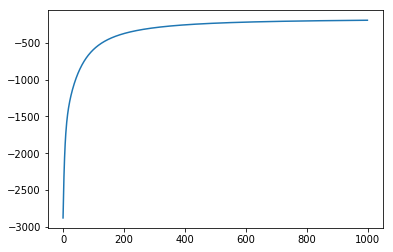

In [7]:
def main():
    # create the data
    Nclass = 500
    D = 2 # dimensionality of input
    M = 3 # hidden layer size
    K = 3 # number of classes

    X1 = np.random.randn(Nclass, D) + np.array([0, -2])
    X2 = np.random.randn(Nclass, D) + np.array([2, 2])
    X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
    X = np.vstack([X1, X2, X3])

    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
    N = len(Y)
    # turn Y into an indicator matrix for training
    T = np.zeros((N, K))
    for i in xrange(N):
        T[i, Y[i]] = 1

    # let's see what it looks like
    plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
    plt.show()

    # randomly initialize weights
    W1 = np.random.randn(D, M)
    b1 = np.random.randn(M)
    W2 = np.random.randn(M, K)
    b2 = np.random.randn(K)

    learning_rate = 10e-7
    costs = []
    for epoch in xrange(100000):
        output, hidden = forward(X, W1, b1, W2, b2)
        if epoch % 100 == 0:
            c = cost(T, output)
            P = np.argmax(output, axis=1)
            r = classification_rate(Y, P)
            print ("cost:", c, "classification_rate:", r)
            costs.append(c)

        # this is gradient ASCENT, not DESCENT
        # be comfortable with both!
        # oldW2 = W2.copy()
        W2 += learning_rate * derivative_w2(hidden, T, output)
        b2 += learning_rate * derivative_b2(T, output)
        W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
        b1 += learning_rate * derivative_b1(T, output, W2, hidden)

    plt.plot(costs)
    plt.show()


if __name__ == '__main__':
    main()